In [24]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/tmp/ipython-input-2428488860.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Model Accuracy: 45.06%

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.93      0.60        72
           1       0.55      0.07      0.12        90

    accuracy                           0.45       162
   macro avg       0.49      0.50      0.36       162
weighted avg       0.50      0.45      0.33       162



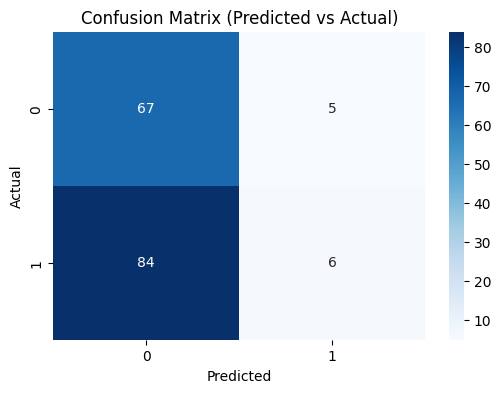


Feature Importance:
 Rolling_Std    0.276376
Returns        0.264651
SMA_200        0.229908
SMA_50         0.229064
dtype: float64


In [25]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

data = yf.download(ticker, start=start_date, end=end_date)

if isinstance(data.columns, pd.MultiIndex):
    data = data.xs('Close', axis=1, level=0, drop_level=False)
else:
    data = data[['Close']]

data.rename(columns={'Close': 'Price'}, inplace=True)

data['Returns'] = data['Price'].pct_change()
data['SMA_50'] = data['Price'].rolling(window=50).mean()
data['SMA_200'] = data['Price'].rolling(window=200).mean()
data['Rolling_Std'] = data['Price'].rolling(window=20).std()

data['Target'] = np.where(data['Price'].shift(-1) > data['Price'], 1, 0)

data.dropna(inplace=True)

features = ['Returns', 'SMA_50', 'SMA_200', 'Rolling_Std']
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", classification_report(y_test, predictions))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Predicted vs Actual)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)